In [11]:
import numpy as np
import matplotlib.pyplot as plt
import raytracing as rt

plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.top']=True
plt.rcParams['ytick.right']=True
# %matplotlib ipympl

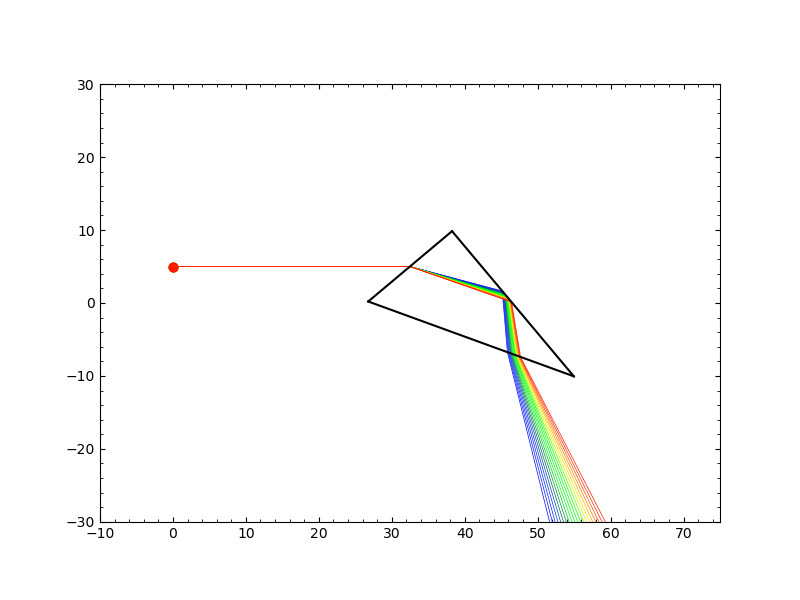

In [12]:
# Prism
scene = rt.Scene(xlim=(-10,75), ylim=(-30,30))

n = lambda l:0.001*(l.value-520)+1.4
prism = rt.Prism(size=30, n=n, angles=[60,30], scene=scene, origin=[40,0], rotation=-20)

white_ray = rt.WhiteRay(wavelengths=np.linspace(450,620,20), scene=scene, origin=[0,5], rotation=0)

scene.plot(show_hitbox=False)

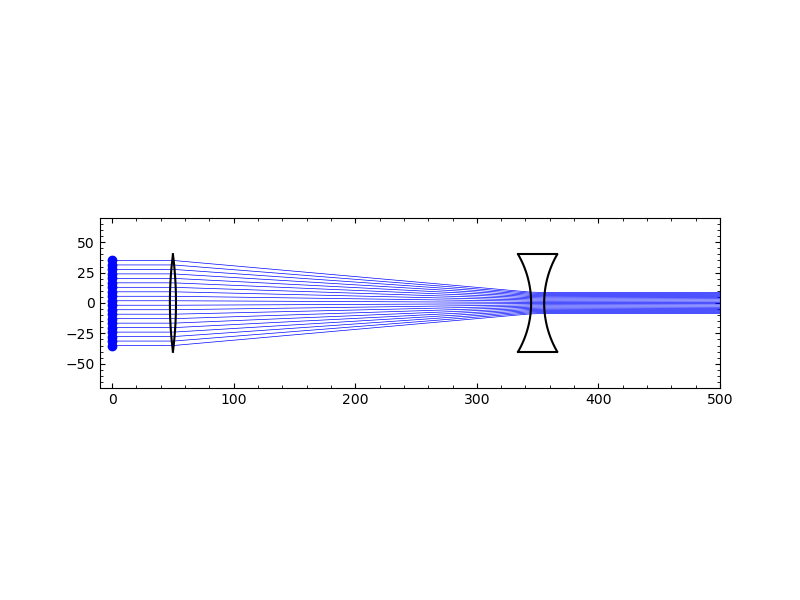

In [13]:
# Lens
scene = rt.Scene(xlim=(-10,500), ylim=(-70,70))

primary_f = 400
secondary_f = -100

primary = rt.ThinSymmetricalLens(focal=primary_f, aperture=80, n=1.4, width=5,
                                 scene=scene, origin=[50,0], rotation=90)
secondary = rt.ThinSymmetricalLens(focal=secondary_f, aperture=80, n=1.4, width=5,
                                   scene=scene, origin=[50+primary_f+secondary_f,0], rotation=90)

beam = rt.CollimatedBeam(aperture=70, N_sources=20, scene=scene, origin=[0,0], rotation=0)

scene.plot(show_hitbox=False)

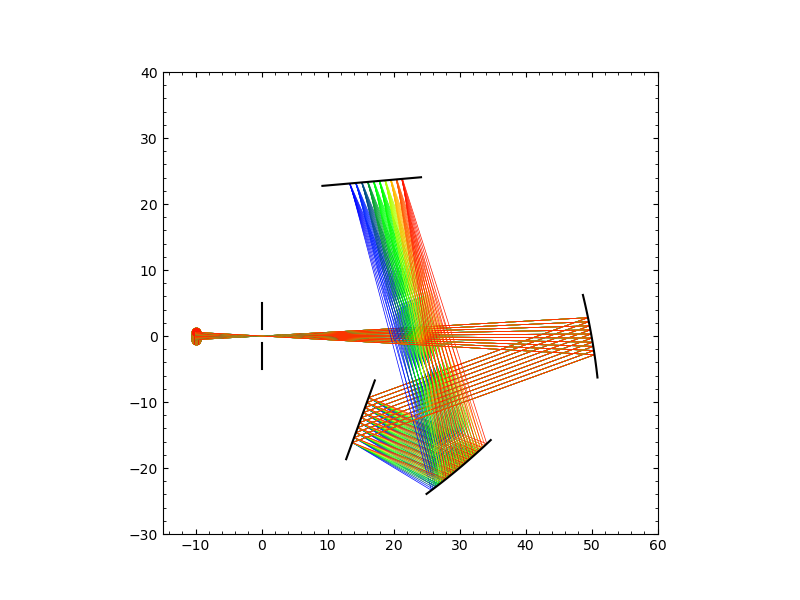

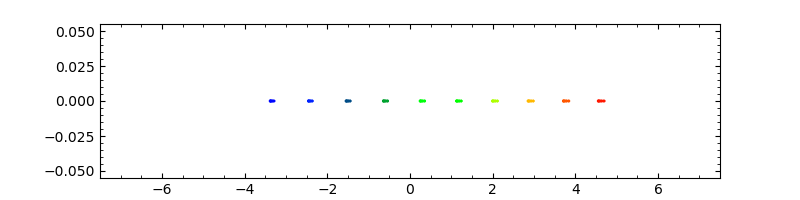

In [14]:
# Czerny-Turner Spectrograph
scene = rt.Scene(xlim=(-15,60), ylim=(-30,40))

slit_width = 2
slit_size = 10
primary_f    = 50
primary_aper = 12.7
second_f     = primary_f
second_aper  = primary_aper

spectrograph = rt.OpticalGroup(scene=scene, origin=[0,0], rotation=0, label="Spectrograph")
slit = rt.Slit(full_size=slit_size, slit_width=slit_width, group=spectrograph, origin=[0,0], rotation=90, label="Slit")
primary = rt.ParabolicMirror(focal=primary_f, aperture=primary_aper, group=spectrograph, origin=[primary_f,0], rotation=100, label="Primary")
secondary = rt.ParabolicMirror(focal=second_f, aperture=second_aper, group=spectrograph, origin=[30,-20], rotation=40, label="Secondary")
grating = rt.Grating(aperture=primary_aper, period=1000, order=1, group=spectrograph, origin=[15,-12.7], rotation=70, label="Grating")
camera = rt.Camera(aperture=15, group=spectrograph, origin=[16.7,23.4], rotation=5, label="Camera")

beam = rt.ConvergingBeam(N_sources=10, focal=10, F=8.9, wavelength=np.linspace(450,620,10), scene=scene, origin=[-10,0], rotation=0, label="Beam")

scene.plot(show_hitbox=False)
camera.plot()

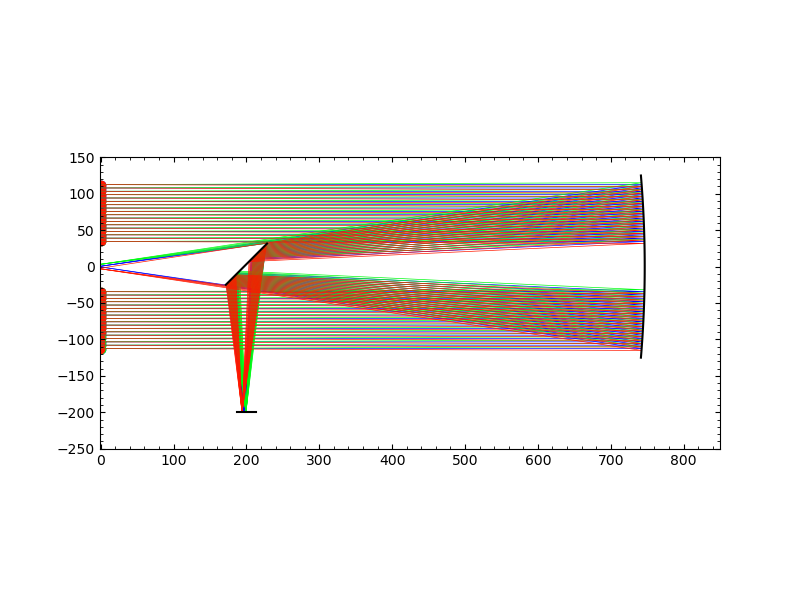

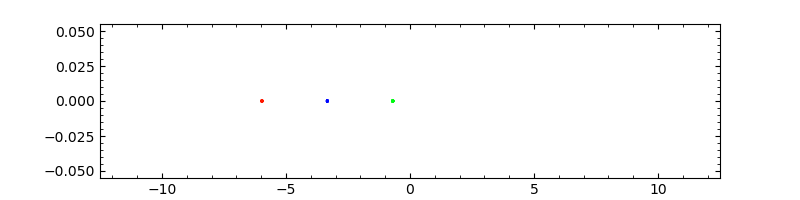

In [15]:
# Newtonian telescope (WIP)
scene = rt.Scene(xlim=(-1,850), ylim=(-250,150), lifetime=2000)
# scene = rt.Scene(xlim=(-8,-2), ylim=(-197,-180), lifetime=2000)

focal = 750
aperture = 250
aperture2 = 80
offset = (aperture*aperture2/focal)/8
# offset=0

newtonian = rt.OpticalGroup(scene=scene, origin=[200,0], rotation=180, label="Newtonian")
primary = rt.ParabolicMirror(focal=focal, aperture=aperture, group=newtonian, origin=[-550+offset,0], rotation=-90, label="Primary")
# primary = rt.SphericalMirror(radius=1504.5, aperture=250, group=newtonian, origin=[550,0], rotation=90, label="Primary")
secondary = rt.FlatMirror(aperture=aperture2, group=newtonian, origin=[0,-offset], rotation=45, label="Secondary")

camera = rt.Camera(aperture=25, scene=scene, origin=[200,-200], rotation=0, label="Camera")

geom = {'Primary':{'Diameter':aperture}, 'Secondary':{'Diameter':aperture2}}
beam = rt.CollimatedBeam(aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=0, N_sources=50, hole=0.8*geom['Secondary']['Diameter'])
beam = rt.CollimatedBeam(wavelength=520, aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=0.2, N_sources=50, hole=0.8*geom['Secondary']['Diameter'])
beam = rt.CollimatedBeam(wavelength=620, aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=-0.2, N_sources=50, hole=0.8*geom['Secondary']['Diameter'])

scene.plot()
camera.plot()

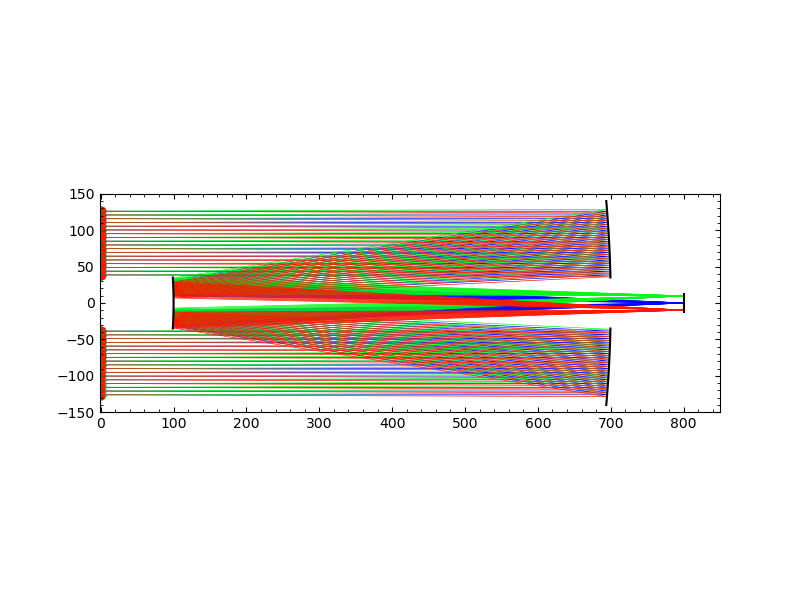

p:\Aurélien\Astronomie\Scripts\Ray tracing\raytracing.py:744: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  ax = plt.subplots(figsize=(8,2))[1] if ax is None else ax


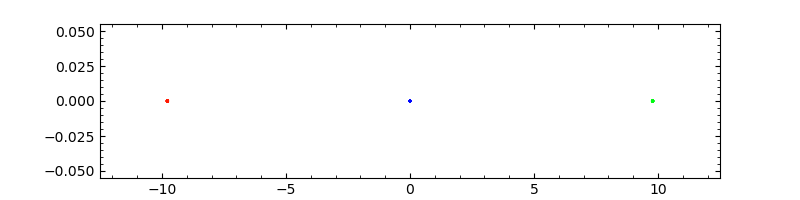

In [16]:
# Cassegrain telescope
scene = rt.Scene(xlim=(-1,850), ylim=(-150,150), lifetime=2000)
# scene = rt.Scene(xlim=(775,805), ylim=(-15,15), lifetime=2000)

cassegrain, geom = rt.CassegrainTelescope(focal=2800, aperture=280, backfocus=100, length=600, scene=scene, origin=[800,0], rotation=180, return_geometry=True)

camera = rt.Camera(25, scene=scene, origin=[800,0], rotation=90)

beam = rt.CollimatedBeam(aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=0, N_sources=50, hole=1.1*geom['Secondary']['Diameter'])
beam = rt.CollimatedBeam(wavelength=520, aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=0.2, N_sources=50, hole=1.1*geom['Secondary']['Diameter'])
beam = rt.CollimatedBeam(wavelength=620, aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=-0.2, N_sources=50, hole=1.1*geom['Secondary']['Diameter'])

scene.plot()
camera.plot()

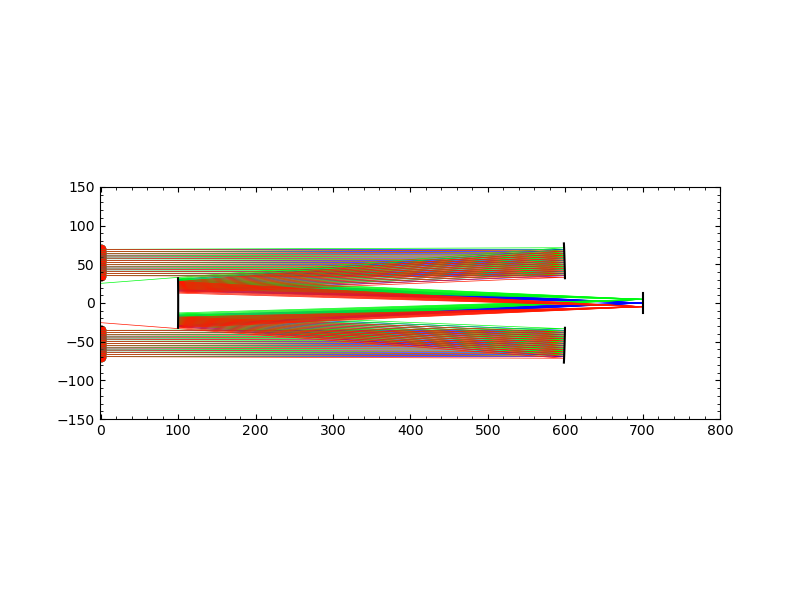

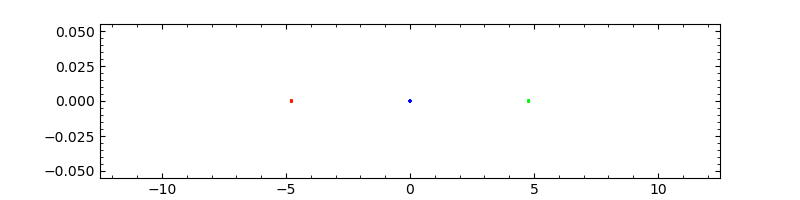

In [17]:
# Ritchey-Chretien telescope
scene = rt.Scene(xlim=(-1,800), ylim=(-150,150), lifetime=2000)
# scene = rt.Scene(xlim=(675,705), ylim=(-15,15), lifetime=2000)

ritchey_chretien, geom = rt.RitcheyChretienTelescope(focal=1370, aperture=154, backfocus=100, length=500, scene=scene, origin=[700,0], rotation=180, return_geometry=True)

camera = rt.Camera(25, scene=scene, origin=[700,0], rotation=90)

beam = rt.CollimatedBeam(aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=0, N_sources=50, hole=1.1*geom['Secondary']['Diameter'])
beam = rt.CollimatedBeam(wavelength=520, aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=0.2, N_sources=50, hole=1.1*geom['Secondary']['Diameter'])
beam = rt.CollimatedBeam(wavelength=620, aperture=0.9*geom['Primary']['Diameter'], scene=scene, origin=[0,0], rotation=-0.2, N_sources=50, hole=1.1*geom['Secondary']['Diameter'])

scene.plot()
camera.plot()

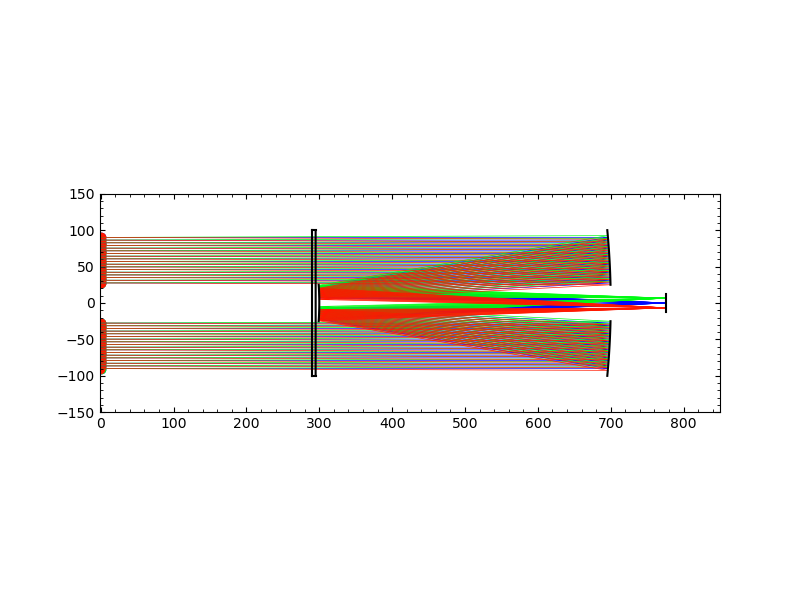

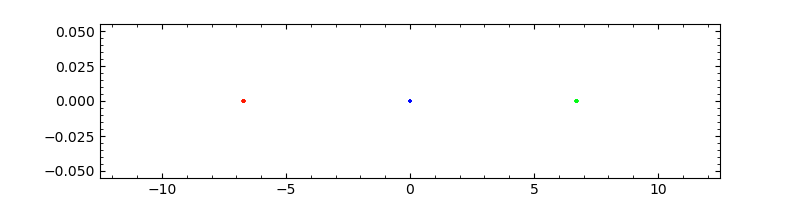

In [18]:
# Schmidt-Cassegrain (WIP)
scene = rt.Scene(xlim=(-1,850), ylim=(-150,150), lifetime=2000)
# scene = rt.Scene(xlim=(776,777), ylim=(-1,1), lifetime=2000)

length = 400
backfocus = 100
focal = 2000
aperture = 200
origin = [800,0]
rotation = 180
label = "Schmidt-Cassegrain"

q = length+backfocus
M = (focal-q)/(q-backfocus)
f1 = focal/M
p = (f1+backfocus)/(M+1)
aperture2 = aperture*p/f1
r2 = 2*q/(M-1)
b = -(4*M)/(M-1)**2 -1
telescope = rt.OpticalGroup(scene=scene, origin=origin, rotation=rotation, label=label)
primary = rt.SphericalMirrorHole(radius=2*f1, aperture=aperture, hole=aperture2, group=telescope, origin=[backfocus,0], rotation=-90)
secondary = rt.HyperbolicMirror(radius=r2, aperture=aperture2, b=b, group=telescope, origin=[q,0], rotation=-90)
corrector = rt.SchmidtCorrector(aperture=aperture, radius=2*f1, n=1.4, width=5, group=telescope, origin=[q+10,0], rotation=-90)

camera = rt.Camera(25, scene=scene, origin=[776.28,0], rotation=90)

beam = rt.CollimatedBeam(aperture=0.9*aperture, scene=scene, origin=[0,0], rotation=0, N_sources=50, hole=1.1*aperture2)
beam = rt.CollimatedBeam(wavelength=520, aperture=0.9*aperture, scene=scene, origin=[0,0], rotation=0.2, N_sources=50, hole=1.1*aperture2)
beam = rt.CollimatedBeam(wavelength=620, aperture=0.9*aperture, scene=scene, origin=[0,0], rotation=-0.2, N_sources=50, hole=1.1*aperture2)

scene.plot()
camera.plot()

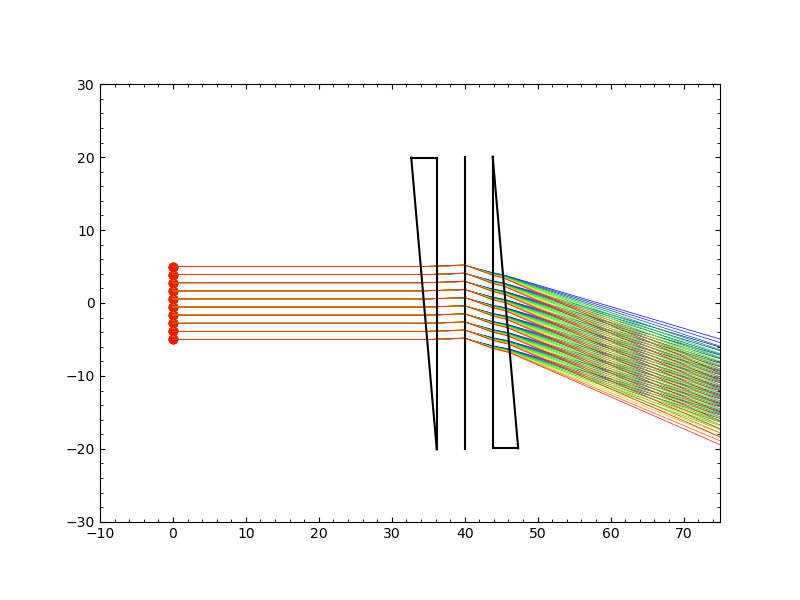

In [19]:
# Grism (WIP)
scene = rt.Scene(xlim=(-10,75), ylim=(-30,30))

n = lambda l:0.001*(l.value-520)+1.4

grism = rt.OpticalGroup(scene=scene, origin=[40,0], rotation=90, label="Grism")
grating = rt.TransmissionGrating(aperture=40, period=500, order=-1, group=grism, origin=[0,0])
prism = rt.Prism(size=40, n=n, angles=[5,90], group=grism, origin=[-6.6,-5], rotation=180)
prism = rt.Prism(size=40, n=n, angles=[5,90], group=grism, origin=[6.6,5], rotation=0)

beam = rt.CollimatedBeam(aperture=10, wavelength=np.linspace(450,620,10), N_sources=10, scene=scene, origin=[0,0], rotation=0)
# con_beam = rt.ConvergingBeam(focal=50, F=10, N_sources=20, scene=scene, origin=[0,0], rotation=0)
# white_ray = rt.WhiteRay(wavelengths=np.linspace(450,620,20), scene=scene, origin=[0,0], rotation=0)

scene.plot(show_hitbox=False)